## 这是一个关于骑手即时配送的数据demo

### 六边形网格可视化

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpathes
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
from matplotlib import cm, colors
import random
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False
pd.set_option('display.float_format', lambda x: '%.2f' % x) 
from matplotlib.colors import ListedColormap, BoundaryNorm

In [2]:
# 建立网格的类别

In [3]:
#分配网格的类别
# 商业区 9 饮食区 16  居民区 31  郊区 44
# 商业区 0  饮食区 1  居民区 2   郊区 3

In [4]:
cateMatrix = [[3, 3, 2, 2, 1, 3, 3, 3, 2, 3],
               [3, 3, 1, 2, 3, 3, 3, 1, 1, 2],
               [2, 0, 2, 3, 3, 3, 3, 0, 1, 2],
               [3, 2, 1, 2, 2, 1, 3, 2, 3, 3],
               [3, 3, 1, 0, 3, 1, 2, 2, 1, 3],
               [1, 3, 3, 2, 2, 0, 0, 2, 3, 3],
               [3, 3, 2, 0, 2, 2, 2, 0, 1, 2],
               [3, 1, 2, 3, 3, 3, 3, 2, 2, 3],
               [3, 1, 2, 2, 3, 3, 3, 2, 0, 2],
               [3, 3, 2, 0, 3, 3, 3, 1, 2, 1]]

In [5]:
cateMatrix = list(np.array(cateMatrix).reshape(100))

In [6]:
gridList = list(range(100))
cateList = cateMatrix
gridCateDict = {'grid':gridList,'cate':cateList}
gridCateDF = pd.DataFrame(data = gridCateDict)

In [7]:
# 建立网格的坐标

In [8]:
gridList = [[i] * 7 for i in range(100)]
gridList = [x for y in gridList for x in y]

In [9]:
XList = []
for i in range(10):
    for j in range(10):
        if i % 2 == 0:
            XBaseline = 2*j + 1
        else:
            XBaseline = 2*j + 2
        oneXList = [XBaseline,XBaseline+1,XBaseline+1,XBaseline,XBaseline-1,XBaseline-1,XBaseline]
        XList.append(oneXList)
XList = [x for y in XList for x in y]

YList = []
for i in range(10):
    for j in range(10):
        YBaseline = 3 + 2 * (9 - i)
        oneYList = [YBaseline,YBaseline - 1, YBaseline - 2, YBaseline - 3, YBaseline - 2, YBaseline - 1,YBaseline]
        YList.append(oneYList)
YList = [x for y in YList for x in y]

gridCooDict = {'grid':gridList,'X': XList,'Y':YList}
gridCooDF = pd.DataFrame(gridCooDict)

In [10]:
c = {'蓝色':'#00589F', '深蓝色':'#003867', '浅蓝色':'#5D9BCF',
     '灰色':'#999999', '深灰色':'#666666', '浅灰色':'#CCCCCC',
     '橙色':'#F68F00', '深橙色':'#A05D00', '浅橙色':'#FBC171'}

In [11]:
df = gridCooDF  # 城市坐标
aqi = gridCateDF # 城市分级

dfCenter = df.groupby('grid').mean()

In [12]:
dfXY = pd.merge(dfCenter,aqi,left_index=True,right_on='grid', how ='left')  # 用左侧的索引做连接键（left_index）,右侧依赖right_on指定

In [13]:
color_value = np.array(dfXY.cate)

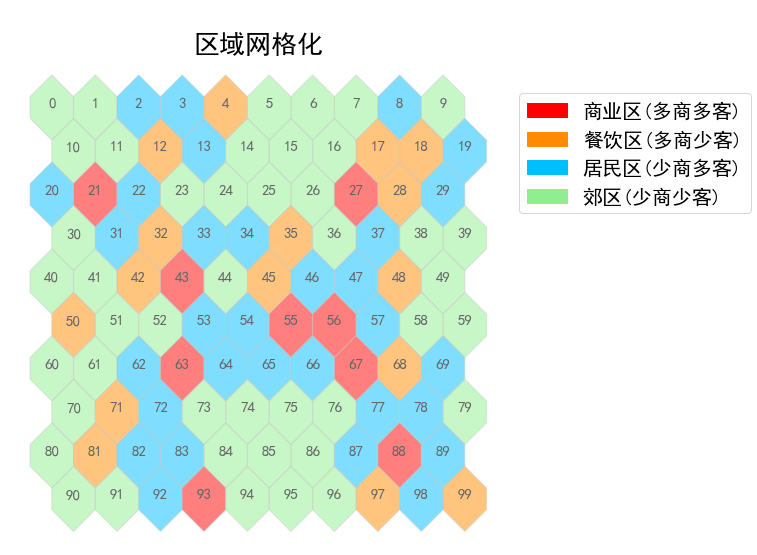

In [14]:
fig, ax = plt.subplots(figsize=(9, 9))
fig.set_facecolor('w')
ax.set_facecolor('w')
ax.set_title('\n区域网格化', loc='center', fontsize=26)


patches = []
for grid in np.unique(df['grid']):
    # 筛选每个城市的数据
    dfp = df[df['grid'] == grid]
    
    # 多边形的每个位置
    rect = mpathes.Polygon([(x, y) for x, y in zip(dfp['X'], dfp['Y'])])
    patches.append(rect)
    
    ax.text(dfCenter.loc[grid].X, dfCenter.loc[grid].Y, str(grid), 
            fontsize=15, va='center', ha='center', color=c['深灰色'])

cmap = ListedColormap(['red', 'darkorange','deepskyblue','lightgreen'])
norm = plt.Normalize(0,3)
    
collection = PatchCollection(patches, alpha=0.5, cmap=ListedColormap(['red', 'darkorange','deepskyblue','lightgreen']), norm = norm,
                             ec=c['浅灰色'], fc='w', lw=1)
collection.set_array(color_value)
#collection.set_clim([0,10])
ax.add_collection(collection)


handles = []
handles.append(Polygon([(0,0),(10,0),(0,-10)],color=collection.cmap(0),label='商业区(多商多客)'))
handles.append(Polygon([(0,0),(10,0),(0,-10)],color=collection.cmap(1),label='餐饮区(多商少客)'))
handles.append(Polygon([(0,0),(10,0),(0,-10)],color=collection.cmap(2),label='居民区(少商多客)'))
handles.append(Polygon([(0,0),(10,0),(0,-10)],color=collection.cmap(3),label='郊区(少商少客)'))
plt.legend(handles=handles,prop = {'size':20},bbox_to_anchor=(1.5,0.95))


# 隐藏边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# 隐藏XY轴
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

plt.axis('equal')

plt.show()

### 设计网格的类并确定网格的邻居

In [15]:
class Node:
    def __init__(self,num):
        self.num = num  #  
        self.X = num%10 # 横轴
        self.Y = num/10 # 纵轴
        self.cate = 0  # 类型
        
        ### 指定邻居
        self.neighbor =[]  # 六位邻居
        self.leftNeighbor = None # 正左边邻居
        self.bottomleftNeighbor = None # 左下方邻居
        self.upperleftNeighbor = None #左上方邻居
        self.rightNeighbor = None # 正右边邻居
        self.bottomrightNeighbor = None # 右下方邻居
        self.upperrightNeighbor = None # 右上方邻居
        
        ### 三环内邻居和三环外邻居（派单时需要用）
        self.lessThreeNodeList = [[],[],[],[]] #  三环内邻居
        self.lessSixNodeList = [[],[],[],[]] #  三环到六环邻居
        self.moreSixNodeList = [[],[],[],[]] # 六环外
        
        
        ###  距离最近的商业区或饮食区
        self.nearestNode = None
        
        
    def set_cate(self,category):
        self.cate = category 
        
    def set_neighbor(self,neighborList):
        self.neighbor = neighborList
        self.leftNeighbor = neighborList[0]
        self.bottomleftNeighbor = neighborList[1]
        self.upperleftNeighbor = neighborList[2]
        self.rightNeighbor = neighborList[3] 
        self.bottomrightNeighbor = neighborList[4]
        self.upperrightNeighbor = neighborList[5] 
        
    def show_neighbor(self):
        if self.leftNeighbor is not None:
            print('left: ' + str(self.leftNeighbor.num))
        else:
            print('left: ' + '空')
        if self.bottomleftNeighbor is not None:
            print('bottomleft: ' + str(self.bottomleftNeighbor.num))
        else:
            print('bottomleft: ' + '空')
        if self.upperleftNeighbor is not None:
            print('upperleft: ' + str(self.upperleftNeighbor.num))
        else:
            print('upperleft: ' + '空')
        if self.rightNeighbor is not None:
            print('right: ' + str(self.rightNeighbor.num))
        else:
            print('right: ' + '空')
        if self.bottomrightNeighbor is not None:
            print('bottomright: ' + str(self.bottomrightNeighbor.num))
        else:
            print('bottomright: ' + '空')
        if self.upperrightNeighbor is not None:
            print('upperright: ' + str(self.upperrightNeighbor.num))
        else:
            print('upperright: ' + '空')
            
        
    def set_threeNeighbor(self,lessThreeNodeList,lessSixNodeList,moreSixNodeList):
        self.lessThreeNodeList = lessThreeNodeList
        self.lessSixNodeList = lessSixNodeList
        self.moreSixNodeList = moreSixNodeList
    
    

In [16]:
# 计算邻居函数

In [17]:
# # 商业区 3  饮食区 2  居民区 1   郊区 0 (类型表示，类型与价值一致)

In [18]:
nodeList = []
for i in range(100):
    tempNode = Node(i)
    tempNode.set_cate(3 - cateMatrix[i])
    nodeList.append(tempNode)   

In [19]:
def cal_neighbor(i):
    left = i - 1 if i % 10 != 0 else None
    right = i + 1 if i % 10 != 9 else None
    if int(i / 10) % 2 == 0: # 为偶数，靠左边
        bottomleft = i + 10 - 1 if i % 10 != 0 and i + 10 <= 99 else None
        upperleft = i - 10 - 1 if i % 10 != 0 and i - 10 >= 10 else None
        bottomright = i + 10 if i + 10 <= 99 else None
        upperright = i - 10 if i - 10 >= 0 else None

    if int(i / 10) % 2 == 1: # 为奇数，靠右边
        bottomleft = i + 10 if (i + 10)  <= 99 else None
        upperleft = i - 10  if (i - 10)  >= 0 else None
        bottomright = i + 10 + 1 if i % 10 != 9 and i + 10 <= 99 else None
        upperright = i - 10 + 1 if i % 10 != 9 and i - 10 >= 0 else None
    
    return [left,bottomleft,upperleft,right,bottomright,upperright]
        
for i in range(100):
    neighborList = cal_neighbor(i)
    neighborList = [nodeList[j] if j is not None else None for j in neighborList]
    nodeList[i].set_neighbor(neighborList)

In [20]:
nodeList[96].show_neighbor()

left: 95
bottomleft: 空
upperleft: 86
right: 97
bottomright: 空
upperright: 87


### 六边形网格如何确立距离函数

In [21]:
### 差两格进一步
def cal_distance(oriIndex,destIndex):
    oriY = int(oriIndex/10)
    oriX = oriIndex % 10
    destY = int(destIndex/10)
    destX = destIndex % 10
    
    # 看纵向的差距
    distY = abs(oriY - destY)
    distX = abs(oriX- destX)
    if distY % 2 == 0:
        distance = distY if distY >= 2 * distX else distX + (1/2) * distY
    else:
        if distY >= (2 * distX + 1):
            distance =distY
        else:
            distX = destX - oriX
            if distX > 0: # 向右推进
                if destY % 2 == 0: # 如果目的地是偶数，即从奇到偶
                    distance = (1/2) * (distY - 1) + distX
                else:
                    distance = (1/2) * (distY - 1) + distX + 1
            else: # 向左推进
                if destY % 2 == 0: # 如果目的地是偶数，即从奇到偶
                    distance = (1/2) * (distY - 1) + (-distX)+ 1
                else:
                    distance = (1/2) * (distY - 1) + (-distX)
            
            
    
    return int(distance)

In [22]:
cal_distance(93,67)

5

### 确立最优路径函数

In [23]:
#  ori
# det
# 如果起点终点在一条线上，则只有一条最优路径
# 如果起点终点不在一条线上，则会形成一个平行四边形（或棱形），需要确定对应的两条方向，并将两条方向作为树的两条边，利用DFS算法压栈

# 计算路径和路径方向


def cal_route_dir(oriIndex,destIndex):
    oriY = int(oriIndex / 10)
    oriX = oriIndex % 10
    destY = int(destIndex / 10)
    destX = destIndex % 10
    numOne = 0
    numTwo = 0
    numOneDir = 0
    numTwoDir = 0
    #   2    5

    # 0         3

    #   1    4

    # 建立两条对角线(确立方向和方向距离)

    if destY < oriY:  # 左上右上对角线
        # 起点对角线与终点所在行相交的左点
        upperleftDist = (oriY - destY) / 2 if (oriY - destY)%2 == 0 else (oriY - destY - 1)/2  if destY%2 == 0 else (oriY - destY - 1)/2 + 1
        # 起点对角线与终点所在行相交的右点
        upperrightDist = (oriY - destY) / 2 if (oriY - destY)%2 == 0 else (oriY - destY - 1)/2 + 1 if destY%2 == 0 else (oriY - destY - 1)/2 
        upperleftGridIndex = destY * 10 + oriX - upperleftDist
        upperrightGridIndex = destY * 10 + oriX + upperrightDist
        # 判断属于哪种情况
        if upperleftGridIndex >= destIndex:   # 左+左上
            numOne = upperleftGridIndex - destIndex
            numOneDir = 0
            numTwo = oriY - destY
            numTwoDir = 2
        elif upperleftGridIndex < destIndex and upperrightGridIndex > destIndex:  # 左上 + 右上
            numOne = destIndex - upperleftGridIndex
            numOneDir = 5
            numTwo = upperrightGridIndex - destIndex
            numTwoDir = 2
        elif upperrightGridIndex <= destIndex: # 右 + 右上
            numOne = destIndex - upperrightGridIndex
            numOneDir = 3
            numTwo = oriY - destY
            numTwoDir = 5
        else:
            pass

    elif destY > oriY: # 左下右下对角线
        # 起点对角线与终点所在行相交的左点
        bottomleftDist = (destY - oriY) / 2 if (destY - oriY)%2 == 0 else (destY - oriY - 1)/2  if destY%2 == 0 else (destY - oriY - 1)/2 + 1
        # 起点对角线与终点所在行相交的右点
        bottomrightDist = (destY - oriY) / 2 if (destY - oriY)%2 == 0 else (destY - oriY - 1)/2 + 1 if destY%2 == 0 else (destY - oriY - 1)/2 
        bottomleftGridIndex = destY * 10 + oriX - bottomleftDist
        bottomrightGridIndex = destY * 10 + oriX + bottomrightDist

        # 判断属于哪种情况
        if bottomleftGridIndex  >= destIndex: #左 + 左下
            numOne = bottomleftGridIndex - destIndex
            numOneDir = 0
            numTwo = destY - oriY
            numTwoDir = 1

        elif bottomleftGridIndex < destIndex and bottomrightGridIndex > destIndex:  # 左下 + 右下
            numOne = destIndex - bottomleftGridIndex
            numOneDir = 4
            numTwo = bottomrightGridIndex - destIndex
            numTwoDir = 1

        elif bottomrightGridIndex <= destIndex: # 右 + 右下
            numOne = destIndex - bottomrightGridIndex
            numOneDir = 3
            numTwo = destY - oriY
            numTwoDir = 4

    else:
        if oriX > destX:
            numOne = oriX - destX
            numOneDir = 0
        elif oriX < destX:
            numOne = destX - oriX
            numOneDir = 3
        else:
            numOne = 0
            numOneDir = 0
            
        numTwo = 0
        numTwoDir = 0
            
    
    numOne = int(numOne)
    numTwo = int(numTwo)
    
    # dirDict = {0:'左',1:'左下',2:'左上',3:'右',5:'右上',4:'右下'}
    
    # print('first direction:' +str(dirDict[numOneDir]))
    # print('first direction distance:' + str(numOne))
    
    # print('second direction:' +str(dirDict[numTwoDir]))
    # print('second direction distance:' + str(numTwo))
    
    
    return numOne,numOneDir,numTwo,numTwoDir



In [24]:
# self.neighbor
# self.cate

def cal_best_route(oriIndex,destIndex):
    numOne,numOneDir,numTwo,numTwoDir = cal_route_dir(oriIndex,destIndex)
    stack = []
    oriNode = nodeList[oriIndex]
    destNode = nodeList[destIndex]

    # 遍历建树
    
    class TreeNode():
        
        def __init__(self,node,index,value,numOne,numTwo):
            self.node = node
            self.index = index
            self.value = value
            self.numOne = numOne
            self.numTwo = numTwo
            self.exploreSymbol = 0

            self.leftTreeNode = None
            self.rightTreeNode = None

        def add_leftNode(self,leftTreeNode):
            self.leftTreeNode = leftTreeNode

        def add_rightNode(self,rightTreeNode):
            self.rightTreeNode = rightTreeNode

        def set_exploreSymbol(symbol):
            self.exploreSymbol = symbol


    oriTreeNode = TreeNode(oriNode,oriNode.num,oriNode.cate,numOne,numTwo)
    stack = [oriTreeNode]
    nextStack = []
    while(len(stack) != 0):
        for treeNode in stack:
            if treeNode.numOne > 0:
                tempLeftNode = treeNode.node.neighbor[numOneDir]  # 提取节点在该方向的邻居
                if tempLeftNode is not None:
                    leftTreeNode = TreeNode(tempLeftNode,tempLeftNode.num,tempLeftNode.cate,treeNode.numOne - 1,treeNode.numTwo)
                    treeNode.add_leftNode(leftTreeNode)
                    nextStack.append(leftTreeNode)
                else:
                    pass
            else:
                pass

            if treeNode.numTwo > 0:
                tempRightNode = treeNode.node.neighbor[numTwoDir]  # 提取节点在该方向的邻居
                if tempRightNode is not None:
                    rightTreeNode = TreeNode(tempRightNode,tempRightNode.num,tempRightNode.cate,treeNode.numOne,treeNode.numTwo - 1)
                    treeNode.add_rightNode(rightTreeNode)
                    nextStack.append(rightTreeNode)
                else:
                    pass
            else:
                pass

        stack = [s for s in nextStack]
        nextStack = []
    
    # 遍历树找最优路径
    

    stack = []
    route = []
    value = oriTreeNode.value
    bestRoute = []
    bestValue = oriTreeNode.value
    stack.append(oriTreeNode)
    route.append(oriTreeNode.index)
    pivot= oriTreeNode
    
    while(len(stack) != 0):
        if pivot.exploreSymbol == 0:  # 探索左子树
            if pivot.leftTreeNode is not None:  # 修改状态并进入左子树
                stack.append(pivot.leftTreeNode)
                route.append(pivot.leftTreeNode.index)
                value += pivot.leftTreeNode.value
                pivot.exploreSymbol = 1
                pivot = pivot.leftTreeNode

            else:  # 修改状态
                pivot.exploreSymbol = 1
            continue



        elif pivot.exploreSymbol == 1:  # 探索右子树
            if pivot.rightTreeNode is not None: # 修改状态并进入右子树
                stack.append(pivot.rightTreeNode)
                route.append(pivot.rightTreeNode.index)
                value += pivot.rightTreeNode.value
                pivot.exploreSymbol = 2
                pivot = pivot.rightTreeNode

            else:
                pivot.exploreSymbol = 2
            continue


        else:
            if pivot.index == destIndex:
                if value > bestValue:
                    bestRoute = [r for r in route]
                    bestValue = value
            value -= stack.pop().value
            route.pop()
            if len(stack) == 0:
                break
            pivot = stack[-1]
    
    return bestRoute,bestValue
   

In [25]:
cal_distance(81,48)

9

In [26]:
# 区域 8km × 8km
# 骑手速度12.11km/h,200m/min

### 生成每天的订单数目

In [27]:
numlist = [1551,1799,5528,13402,6512,3302,2243,1844,2054,2948,2976,2101,1428,990,772]
sumnumlist = sum(numlist)
perlist = [0] * len(numlist)
for i in range(len(numlist)):
    perlist[i] = round(numlist[i]/sumnumlist,4)
origindaynumlist = []
for i in range(30):
    num = round(20000 * (1 + (random.random()* 0.6 - 0.3)))
    origindaynumlist.append(num)
origindaynumlist = [int(x/4) for x in origindaynumlist]

In [28]:
# 一天15个小时，从早上8:00到晚上10：00

In [29]:
wholeNumList=[] # 30 + 15 + 12
for i in range(30):
    originlist = [per*origindaynumlist[i] for per in perlist]
    originlist = [round(originnum) for originnum in originlist]  # 每天原始的每小时的订单，由真实数据概率生成
    daynumlist = []
    for j in range(15):
        originlist[j] = round(originlist[j] * (random.random() * 0.2 + 0.9))
        slotnumlist = []
        # 特殊考虑时间段一：10-13
        # 特殊考虑时间段二：16-19
        # 剩下时间点保持不变
        if j == 2:
            wholenum = originlist[2] + originlist[3] + originlist[4] + originlist[5]
            beginnum = (originlist[1] * 0.08)
            endnum = (originlist[6] * 0.08) 
            highnum = (wholenum - 9*beginnum - 15*endnum)/24
            for k in range(48):
                if k <= 17:
                    num = beginnum + (highnum - beginnum) * (k/17)
                    slotnumlist.append(round(num * (random.random()*0.6 + 0.7)))
                else:
                    num = endnum + (highnum - endnum) * ((47-k)/30)
                    slotnumlist.append(round(num * (random.random()*0.6 + 0.7)))
        elif j == 8:
            wholenum = originlist[8] + originlist[9] + originlist[10] + originlist[11]
            beginnum = (originlist[7] * 0.08)
            endnum = (originlist[12] * 0.08) 
            highnum = (wholenum - 9*beginnum - 15*endnum)/24
            for k in range(48):
                if k <= 17:
                    num = beginnum + (highnum - beginnum) * k/17
                    slotnumlist.append(round(num * (random.random()*0.6 + 0.7)))
                else:
                    num = endnum + (highnum - endnum) * ((47-k)/30)
                    slotnumlist.append(round(num * (random.random()*0.6 + 0.7)))
        elif j in [3,4,5,9,10,11]:
            continue
        else:
            for k in range(12):
                slotnumlist.append(round(originlist[j] * 0.08 * (random.random()*0.6 + 0.7)))
        if len(slotnumlist) == 48:
            daynumlist.append(slotnumlist[:12])
            daynumlist.append(slotnumlist[12:24])
            daynumlist.append(slotnumlist[24:36])
            daynumlist.append(slotnumlist[36:])
        else:
            daynumlist.append(slotnumlist)
    wholeNumList.append(daynumlist)

### 确定订单的起终点

In [30]:
# 商业区 9 饮食区 16  居民区 31  郊区 44
# 起点 商业区  30%    饮食区  35%     居民区  15%    郊区  10%
# 距离  <= 3  50%   > 3 <= 6 45%   > 6 5%
# 终点  商业区 25%  饮食区 5%  居民区 60%  郊区  10%

In [31]:
nodeType0 = []
nodeType1 = []
nodeType2 = []
nodeType3 = []
for node in nodeList:
    if node.cate == 0:
        nodeType0.append(node.num)
    elif node.cate == 1:
        nodeType1.append(node.num)
    elif node.cate == 2:
        nodeType2.append(node.num)
    else:
        nodeType3.append(node.num)

In [32]:
for node in nodeList:
    lessThreeList = [[],[],[],[]]
    lessSixList = [[],[],[],[]]
    moreSixList = [[],[],[],[]]
    for i in range(100):
        distance = cal_distance(node.num,nodeList[i].num)
        if distance <= 3:
            lessThreeList[nodeList[i].cate].append(nodeList[i].num)
        elif distance > 3 and distance <=6:
            lessSixList[nodeList[i].cate].append(nodeList[i].num)
        else:
            moreSixList[nodeList[i].cate].append(nodeList[i].num)
    node.set_threeNeighbor(lessThreeList,lessSixList,moreSixList)

In [33]:
num = 0  # 订单ID 
finalOrderList = []
for i in range(30):  # 每一天
    onedayOrderList = []
    for j in range(15):  # 每个小时
        for k in range(12):  # 每个时段
            oneslotOrderList = []
            orderNum = wholeNumList[i][j][k]  # 这个时段有多少订单
            while orderNum >= 0:
                ID = 'OD'+'0'*(6 - len(str(num))) + str(num) # 订单ID
                day = i # 订单天数 
                time = 12*j + k
                
                
                # 生成订单起点
                randoma = random.random()
                if randoma <= 0.3:
                    merchantNode = random.choice(nodeType3)
                elif randoma > 0.3 and randoma <= 0.65:
                    merchantNode = random.choice(nodeType2)
                elif randoma > 0.65 and randoma <= 0.9:
                    merchantNode = random.choice(nodeType1)
                elif randoma > 0.9:
                    merchantNode = random.choice(nodeType0)
                else:
                    pass
                
                # 生成订单终点
                # 生成终点距离
                randomb = random.random()
                userNodeDisList = []
                if randomb <= 0.5:
                    userNodeDisList = nodeList[merchantNode].lessThreeNodeList
                elif randomb > 0.5 and randomb <= 0.95:
                    userNodeDisList = nodeList[merchantNode].lessSixNodeList
                elif randomb > 0.95:
                    userNodeDisList = nodeList[merchantNode].moreSixNodeList
                else:
                    pass
                
                # 生成终点类型
                randomc = random.random()
                if randomc <= 0.25:
                    if len(userNodeDisList[3]) > 0:
                        userNode = random.choice(userNodeDisList[3])
                    else:
                        userNode = random.choice(userNodeDisList[0] + userNodeDisList[1] + userNodeDisList[2])
                if randomc > 0.25 and randomc <= 0.3:
                    if len(userNodeDisList[2]) > 0:
                        userNode = random.choice(userNodeDisList[2])
                    else:
                        userNode = random.choice(userNodeDisList[0] + userNodeDisList[1] + userNodeDisList[3])
                    
                if randomc > 0.3 and randomc <= 0.9:
                    if len(userNodeDisList[1]) > 0:
                        userNode = random.choice(userNodeDisList[1])
                    else:
                        userNode = random.choice(userNodeDisList[0] + userNodeDisList[2] + userNodeDisList[3])
                if randomc> 0.9:
                    if len(userNodeDisList[0]) > 0:
                        userNode = random.choice(userNodeDisList[0])
                    else:
                        userNode = random.choice(userNodeDisList[1] + userNodeDisList[2] + userNodeDisList[3])
                else:
                    pass
            
                
                distance = cal_distance(merchantNode,userNode)
                promiseTime = max(30,distance * 4 + 6 + 20)
                promiseTime = round(min(50,promiseTime))
                price = round(2 + distance * 1 + random.random() * 2,1)
                
                orderInfo = [ID,day,time,merchantNode,userNode,distance,promiseTime,price]
                oneslotOrderList.append(orderInfo)
                num = num + 1
                orderNum -= 1
                
                
            onedayOrderList.append(oneslotOrderList)
    finalOrderList.append(onedayOrderList)                

In [34]:
import pickle
file = open('OrderList.pickle','wb')
pickle.dump(finalOrderList,file)
file.close()